In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
rnd_state=42
np.random.seed(rnd_state)

df = pd.read_csv('DOHMH_New_York_City_Restaurant_Inspection_Results.csv', sep = ',')
df.head()

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE
0,40511702,NOTARO RESTAURANT,MANHATTAN,635,SECOND AVENUE,10016.0,2126863400,Italian,06/15/2015,Violations were cited in the following area(s).,02B,Hot food item not held at or above 140Âº F.,Critical,30.0,NaN,NaN,08/28/2017,Cycle Inspection / Initial Inspection
1,40511702,NOTARO RESTAURANT,MANHATTAN,635,SECOND AVENUE,10016.0,2126863400,Italian,11/25/2014,Violations were cited in the following area(s).,20F,Current letter grade card not posted.,Not Critical,NaN,NaN,NaN,08/28/2017,Administrative Miscellaneous / Initial Inspection
2,50046354,VITE BAR,QUEENS,2507,BROADWAY,11106.0,3478134702,Italian,10/03/2016,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Not Critical,2.0,NaN,NaN,08/28/2017,Pre-permit (Operational) / Initial Inspection
3,50061389,TACK'S CHINESE TAKE OUT,STATEN ISLAND,11C,HOLDEN BLVD,10314.0,7189839854,Chinese,05/17/2017,Violations were cited in the following area(s).,02G,Cold food item held above 41Âº F (smoked fish ...,Critical,46.0,NaN,NaN,08/28/2017,Pre-permit (Operational) / Initial Inspection
4,41516263,NO QUARTER,BROOKLYN,8015,5 AVENUE,11209.0,7187019180,American,03/30/2017,Violations were cited in the following area(s).,04M,Live roaches present in facility's food and/or...,Critical,18.0,NaN,NaN,08/28/2017,Cycle Inspection / Initial Inspection


In [19]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
original_len = len(df)
print('The original dataset is made of %d entries.' %(original_len))

The original dataset is made of 399918 entries.


In [21]:
df['INSPECTION DATE'] = pd.to_datetime(df['INSPECTION DATE'])
df = df[df['INSPECTION DATE'] > '2009-12-31']
df['MONTH']=pd.DatetimeIndex(df['INSPECTION DATE']).month

print('%d points had invalid dates.' %(original_len-len(df)))

1135 points had invalid dates.


In [22]:

cuisine_counts = {}
major_cuisines = []
threshold = 0.03 # Threshold to discriminate the presence of restaurants.
                # At the moment it selects cuisines that represent 97% of restaurants.
for i in df['CUISINE DESCRIPTION'].unique():
    cuisine_counts[i] = float(len(df[df['CUISINE DESCRIPTION']==i]))

major_cuisines = [i for i in cuisine_counts.keys() if cuisine_counts[i]/sum(cuisine_counts.values()) > threshold]

In [23]:
season_dict = {}
for month in range(1,13):
    if month > 2 and month < 6:
        season_dict[month] = 'Spring'
    elif month > 2 and month < 9:
        season_dict[month] = 'Summer'
    elif month > 2 and month < 12:
        season_dict[month] = 'Fall'
    else:
        season_dict[month] = 'Winter'

df['SEASON'] = df['MONTH'].map(season_dict)

In [24]:
df.head()

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE,MONTH,SEASON
0,40511702,NOTARO RESTAURANT,MANHATTAN,635,SECOND AVENUE,10016.0,2126863400,Italian,2015-06-15,Violations were cited in the following area(s).,02B,Hot food item not held at or above 140Âº F.,Critical,30.0,NaN,NaN,08/28/2017,Cycle Inspection / Initial Inspection,6,Summer
1,40511702,NOTARO RESTAURANT,MANHATTAN,635,SECOND AVENUE,10016.0,2126863400,Italian,2014-11-25,Violations were cited in the following area(s).,20F,Current letter grade card not posted.,Not Critical,NaN,NaN,NaN,08/28/2017,Administrative Miscellaneous / Initial Inspection,11,Fall
2,50046354,VITE BAR,QUEENS,2507,BROADWAY,11106.0,3478134702,Italian,2016-10-03,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Not Critical,2.0,NaN,NaN,08/28/2017,Pre-permit (Operational) / Initial Inspection,10,Fall
3,50061389,TACK'S CHINESE TAKE OUT,STATEN ISLAND,11C,HOLDEN BLVD,10314.0,7189839854,Chinese,2017-05-17,Violations were cited in the following area(s).,02G,Cold food item held above 41Âº F (smoked fish ...,Critical,46.0,NaN,NaN,08/28/2017,Pre-permit (Operational) / Initial Inspection,5,Spring
4,41516263,NO QUARTER,BROOKLYN,8015,5 AVENUE,11209.0,7187019180,American,2017-03-30,Violations were cited in the following area(s).,04M,Live roaches present in facility's food and/or...,Critical,18.0,NaN,NaN,08/28/2017,Cycle Inspection / Initial Inspection,3,Spring


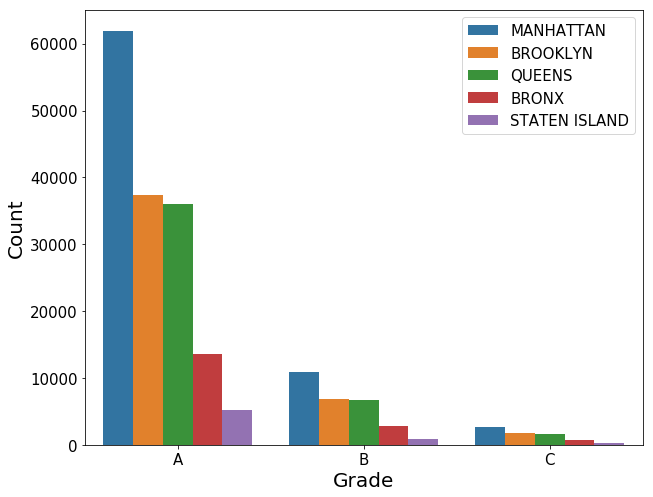

In [25]:

grades = df[df['GRADE'].isin(['A','B', 'C'])]
fig = plt.figure(figsize=(10,8))
#grades['GRADE'].value_counts()
ax = sns.countplot(x='GRADE', hue='BORO', data=grades, order=grades['GRADE'].value_counts().index, hue_order=grades['BORO'].value_counts().index)
ax.set_ylabel('Count', fontsize=20)
ax.set_xlabel('Grade', fontsize=20)
ax.tick_params(labelsize=15)
ax = plt.legend(fontsize=15)

In [26]:
dt = grades.loc[:, ["CUISINE DESCRIPTION", "INSPECTION TYPE", "MONTH", "GRADE"]]
dt = dt.sample(frac=1).reset_index(drop=True) # Shuffle the samples to increase randomness.
dt = dt.dropna()
Y = dt['GRADE']
X = dt.drop(dt.columns[-1], axis=1)

In [27]:
X.head()

,CUISINE DESCRIPTION,INSPECTION TYPE,MONTH
0,Mexican,Cycle Inspection / Re-inspection,5
1,Donuts,Cycle Inspection / Re-inspection,11
2,Pizza/Italian,Cycle Inspection / Initial Inspection,10
3,Caribbean,Cycle Inspection / Re-inspection,6
4,"Latin (Cuban, Dominican, Puerto Rican, South &...",Cycle Inspection / Re-inspection,3


In [28]:
Y.head()

0    A
1    A
2    A
3    B
4    A
Name: GRADE, dtype: object

In [29]:
from sklearn.preprocessing import LabelEncoder
for col in X.columns[:]:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

In [30]:
#Supervised Method with Kmeans to predict GRADE

from sklearn.cluster import KMeans
import numpy as np
km = KMeans(n_clusters=3, 
            init='random', 
            n_init=10, 
            max_iter=300,
            tol=1e-04,
            random_state=42)

In [31]:
y_km = km.fit_predict(X)
labels = np.unique(y_km)
print(labels)

[0 1 2]


In [32]:
from collections import Counter
cl_map = dict()
for i in range(len(labels)):
    counter = Counter(Y[y_km ==i])
    cl_map[i] = counter.most_common(1)[0][0]
y_km_class = [cl_map[i] for i in y_km]
y_km_class = np.asarray(y_km_class)

In [33]:
y_km_class[y_km_class!=Y]='Wrong'

In [34]:
dt = dt.assign(pred_class=y_km_class)
dt.head()


,CUISINE DESCRIPTION,INSPECTION TYPE,MONTH,GRADE,pred_class
0,Mexican,Cycle Inspection / Re-inspection,5,A,A
1,Donuts,Cycle Inspection / Re-inspection,11,A,A
2,Pizza/Italian,Cycle Inspection / Initial Inspection,10,A,A
3,Caribbean,Cycle Inspection / Re-inspection,6,B,W
4,"Latin (Cuban, Dominican, Puerto Rican, South &...",Cycle Inspection / Re-inspection,3,A,A


In [35]:
dt['pred_class'].value_counts()

A    154193
W     35158
Name: pred_class, dtype: int64

In [36]:
Accuracy_KMean = print(154193/(35158 + 154193))

0.8143236634609798


In [37]:
#Supervised Method with Logistic Regression topredict GRADE

from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)


C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [38]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, Y_test)))

Accuracy of logistic regression classifier on test set: 0.82


In [39]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y_test, y_pred)
print(confusion_matrix)

[[46350     0     0]
 [ 8345     0     0]
 [ 2111     0     0]]


In [40]:
# Supervised Method with Decision tree to predict GRADE

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y) # default Train 0.75- Test 0.25
print("There are {} samples in the training dataset".format(X_train.shape[0]))
print("There are {} samples in the testing dataset".format(X_test.shape[0]))
print("Each sample has {} features".format(X_train.shape[1]))

There are 142013 samples in the training dataset
There are 47338 samples in the testing dataset
Each sample has 3 features


In [41]:
Y = dt[['GRADE']]
from sklearn import tree
estimator = tree.DecisionTreeClassifier(criterion="entropy")

In [42]:
estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [43]:
y_predicted_train = estimator.predict(X_train)
accuracy_train = np.mean(y_train == y_predicted_train) * 100
print("The accuracy on training set is {0:.1f}%".format(accuracy_train))

The accuracy on training set is 82.1%


In [44]:
y_predicted_test = estimator.predict(X_test)
accuracy_test = np.mean(y_test == y_predicted_test) * 100
print("The accuracy on test set is {0:.1f}%".format(accuracy_test))

The accuracy on test set is 81.9%


In [45]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_predicted_test))

[[38298   259    34]
 [ 6677   308    14]
 [ 1558    27   163]]


In [46]:
avg_scores = []
# all_scores = []
# parameter_values = [10**exp for exp in np.arange(-2.0,0.0, 0.25)]
#parameter_values = np.arange(0,1, 0.05)
parameter_values = np.arange(1,10)
for hp in parameter_values:
    estimator = tree.DecisionTreeClassifier(criterion="entropy"
#                                            , min_impurity_decrease = hp
                                            , max_depth = hp
                                           )
    estimator.fit(X_train, y_train)
    y_predicted = estimator.predict(X_test)
    score = np.mean(y_test == y_predicted) * 100 # compute the matches between prediction and true classes
#    avg_scores.append(np.mean(scores))
    avg_scores.append(score)
#    all_scores.append(scores)

Text(0, 0.5, 'accuracy')

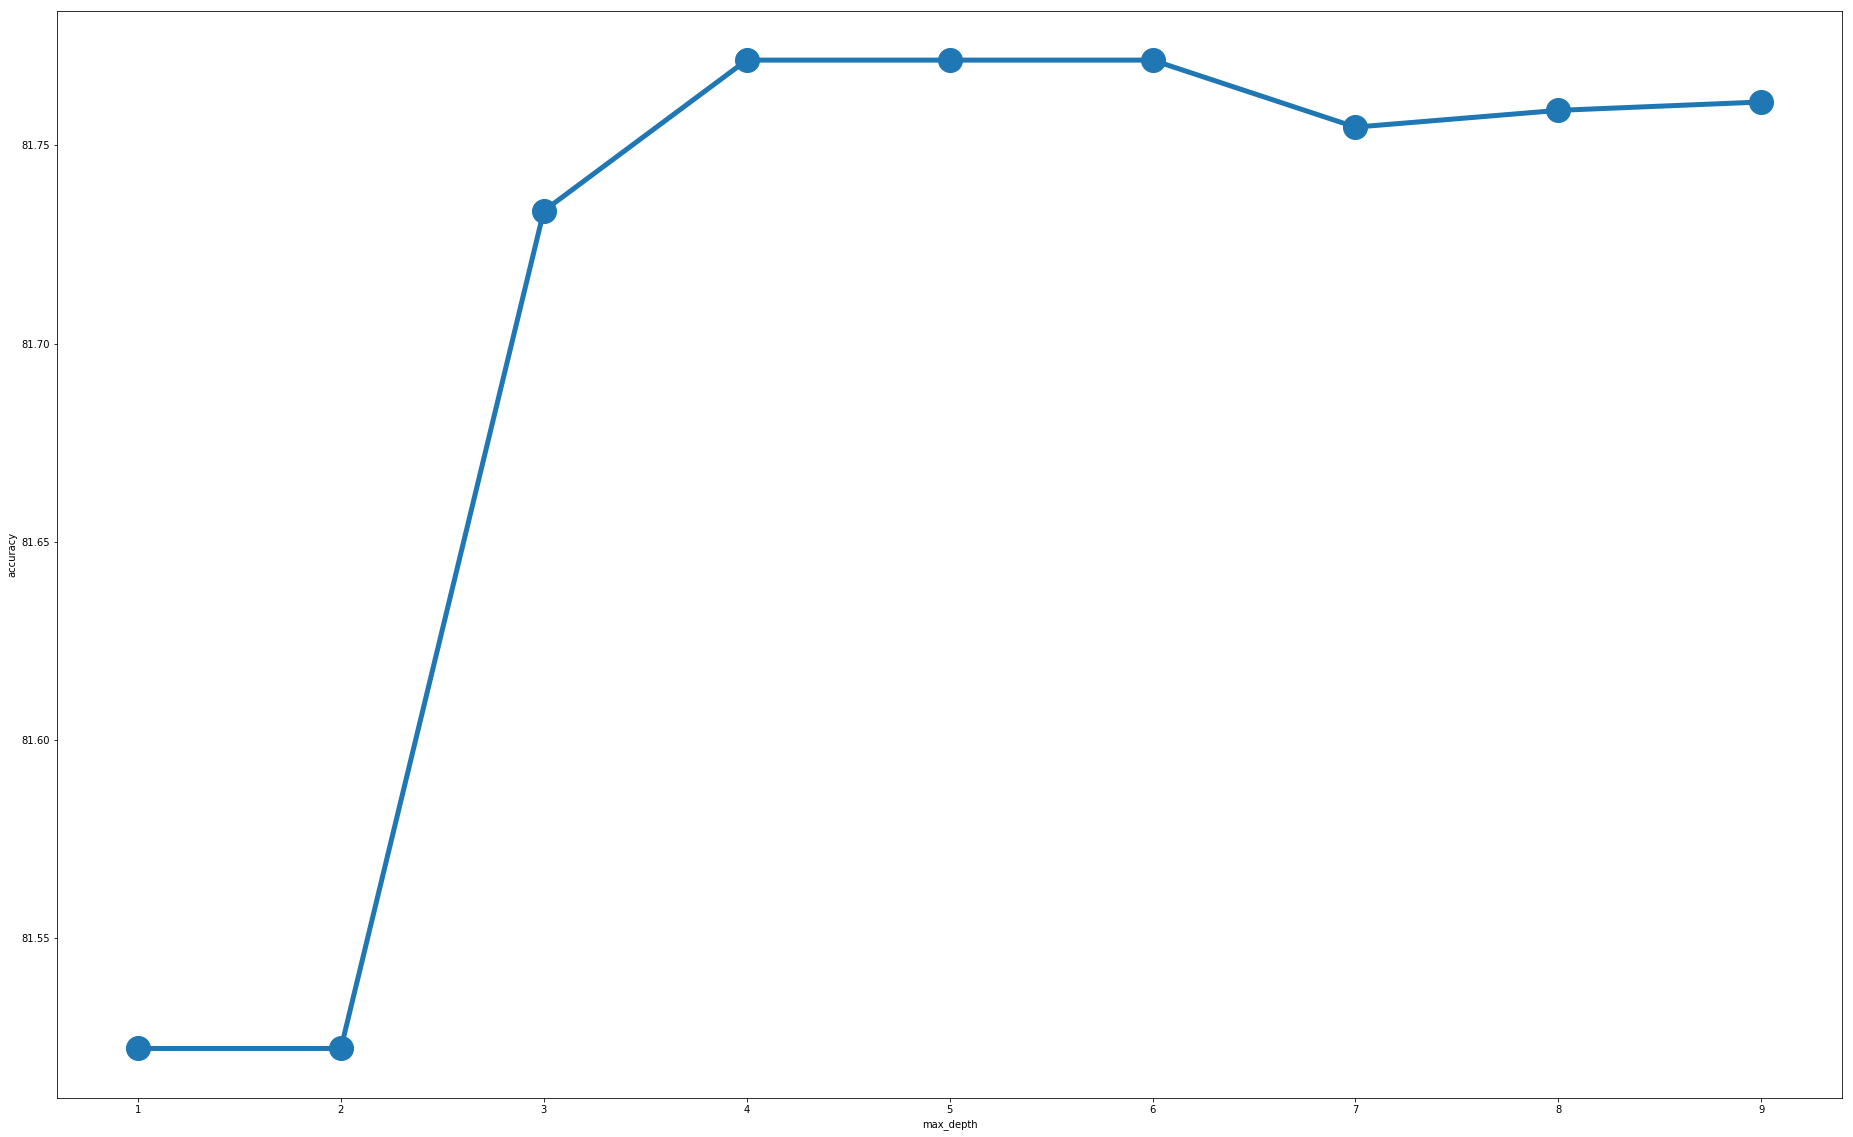

In [353]:
from matplotlib import pyplot as plt
plt.figure(figsize=(32,20))
plt.plot(parameter_values, avg_scores, '-o', linewidth=5, markersize=24)
plt.xlabel('max_depth')
plt.ylabel('accuracy')
#plt.semilogx(parameter_values, avg_scores, '-o', linewidth=5, markersize=24)
#plt.axis([0, max(parameter_values), 0, 1.0])

In [356]:
estimator = tree.DecisionTreeClassifier(criterion="entropy"
#                                            , min_impurity_decrease = parameter_values[np.argmax(avg_scores)]
#                                            , min_samples_leaf = 2
                                        , max_depth = 4
                                       )
estimator.fit(X,Y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

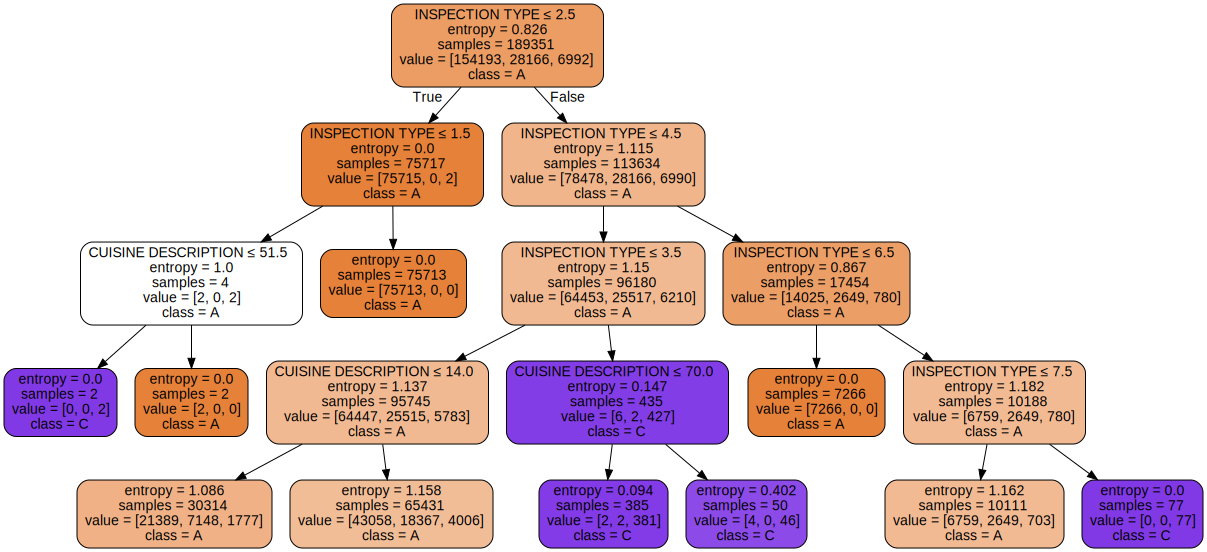

In [357]:
import graphviz 
dot_data = tree.export_graphviz(estimator, out_file=None,
                                feature_names=X.keys(),
                                class_names=np.unique(Y),
                                filled=True, rounded=True,
                                special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

In [358]:
y_predicted_test = estimator.predict(X_test)
accuracy_test = np.mean(y_test == y_predicted_test) * 100
print("The accuracy on test set is {0:.1f}%".format(accuracy_test))

The accuracy on test set is 81.8%


In [359]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_predicted_test))

[[38589     0     2]
 [ 6997     0     2]
 [ 1628     0   120]]


In [360]:
#Classification method with Random forest to predict GRADE

Y = dt[['GRADE']]
from sklearn.preprocessing import LabelEncoder
for col in Y.columns[:]:
    le = LabelEncoder()
    Y[col] = le.fit_transform(Y[col])

C:\Users\ASUS\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [361]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size= 0.25, random_state=14)

In [362]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train, y_train)

y_pred=clf.predict(X_test)

C:\Users\ASUS\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


In [363]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train, y_train)

y_pred1=clf.predict(X_train)

C:\Users\ASUS\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


In [364]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy test set:",metrics.accuracy_score(y_test, y_pred))

Accuracy test set: 0.8155181883476277


In [365]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Training set accuracy
print("Accuracy training set:",metrics.accuracy_score(y_train, y_pred1))

Accuracy training set: 0.8220796687627189


In [366]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[38140   273    31]
 [ 6823   296    18]
 [ 1558    30   169]]


Text(0.5, 1.0, 'Supervised methods')

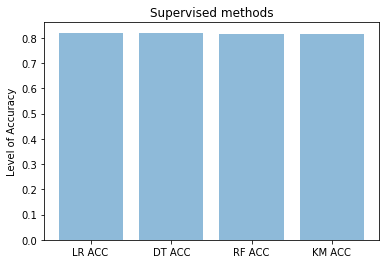

In [368]:
import numpy as np
import matplotlib.pyplot as plt
 
Accuracy = ('LR ACC ', 'DT ACC', 'RF ACC', 'KM ACC')
performance = [0.82, 0.818, 0.815, 0.814]
y_pos = performance
 
plt.bar(Accuracy, performance, align='center', alpha=0.5)
plt.xticks(Accuracy)
plt.ylabel('Level of Accuracy')
plt.title('Supervised methods')